<a href="https://colab.research.google.com/github/JayabharathiRavi/HOME_LLC/blob/main/Home_LLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#S&P Case-Shiller Home Price Index

**PROBLEM STATEMENT :**

Build a model using publicly available data for key *national* demand & supply factors that could influence US home prices. Use that to explain how these factors impacted home prices over the last ~20 years. You can use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

Definitions
- A national factor is one that impacts home prices nationally. For example:
The US unemployment rate is a national factor
Boston’s unemployment rate is NOT a national factor
Avg. no of bedrooms in California is not a national factor

- A demand factor is one that primarily impacts demand for homes from consumers. (Ex. Unemployment rate)

- A supply factor is one that primarily impacts the supply of homes (i.e. total homes available for sale). (Ex. Availability of land)

**DATA :**

https://docs.google.com/spreadsheets/d/1lLW2zur0NA-VeIDuDk9j4qZPPIx9YRm1fN5bY_310Ac/edit?usp=sharing

**REQUIRMENT:**

Find the factors impacted home prices over the last ~20 years




In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings 
warnings.filterwarnings("ignore")

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from matplotlib import pyplot
import graphviz
from sklearn import tree


#*IMPORT THE DATASET*

In [4]:
df=pd.read_csv('/content/s&p_case-shiller.csv')
df.head()

,DATE,CSUSHPISA,SPCS10RSA,DEXRSA,LVXRSA,LXXRSA,MIXRSA,MNXRSA,NYXRSA,PHXRSA,POXRSA,SDXRSA,SFXRSA
0,2000-01-01,100.552,100.745303,100.145625,100.401379,101.031209,99.943409,100.188699,100.339230,100.412854,100.592581,101.104566,101.449954
1,2000-02-01,101.339,101.893169,100.876064,100.904482,102.043406,100.473787,100.971705,101.240657,100.938497,101.248220,102.409577,104.170604
2,2000-03-01,102.127,103.154350,101.374341,101.437483,103.224699,101.086462,101.631166,102.060631,101.715135,101.555933,104.090946,107.337223
3,2000-04-01,102.922,104.530843,101.764303,101.595701,104.159399,102.011263,102.974796,103.132503,102.272077,102.176641,105.707103,110.632994
4,2000-05-01,103.677,106.011979,102.578368,102.046929,104.924698,102.752969,104.406683,104.915869,102.989036,102.075554,107.134848,113.800513


## *SMALL SUMMARY OF THE DATA*

In [5]:
df.shape

(269, 13)

In [6]:
df.columns

Index(['DATE', 'CSUSHPISA', 'SPCS10RSA', 'DEXRSA', 'LVXRSA', 'LXXRSA',
       'MIXRSA', 'MNXRSA', 'NYXRSA', 'PHXRSA', 'POXRSA', 'SDXRSA', 'SFXRSA'],
      dtype='object')

S&P/Case-Shiller U.S. National Home Price Index  (CSUSHPISA)

S&P/Case-Shiller 10-City Composite Home Price Index  (SPCS10RSA)

S&P/Case-Shiller MI-Detroit Home Price Index  (DEXRSA)

S&P/Case-Shiller NV-Las Vegas Home Price Index  (LVXRSA)

S&P/Case-Shiller CA-Los Angeles Home Price Index  (LXXRSA)

S&P/Case-Shiller FL-Miami Home Price Index  (MIXRSA)

S&P/Case-Shiller MN-Minneapolis Home Price Index  (MNXRSA)

S&P/Case-Shiller NY-New York Home Price Index  (NYXRSA)

S&P/Case-Shiller AZ-Phoenix Home Price Index  (PHXRSA)

S&P/Case-Shiller OR-Portland Home Price Index  (POXRSA)

S&P/Case-Shiller CA-San Diego Home Price Index  (SDXRSA)

S&P/Case-Shiller CA-San Francisco Home Price Index  (SFXRSA)



In [7]:
df_new = df.rename(columns={'CSUSHPISA': 'US','SPCS10RSA':'10-City_Composite','DEXRSA':'Detroit','LVXRSA':'Las_vegas',
                            'LXXRSA':'Los_Angeles','MIXRSA':'Miami','MNXRSA':'Minneapolis',
                            'NYXRSA':'New_York','PHXRSA':'Phoenix','POXRSA':'Portland','SDXRSA':'San_Diego',
                            'SFXRSA':'San_Francisco'})
df_new.head()

,DATE,US,10-City_Composite,Detroit,Las_vegas,Los_Angeles,Miami,Minneapolis,New_York,Phoenix,Portland,San_Diego,San_Francisco
0,2000-01-01,100.552,100.745303,100.145625,100.401379,101.031209,99.943409,100.188699,100.339230,100.412854,100.592581,101.104566,101.449954
1,2000-02-01,101.339,101.893169,100.876064,100.904482,102.043406,100.473787,100.971705,101.240657,100.938497,101.248220,102.409577,104.170604
2,2000-03-01,102.127,103.154350,101.374341,101.437483,103.224699,101.086462,101.631166,102.060631,101.715135,101.555933,104.090946,107.337223
3,2000-04-01,102.922,104.530843,101.764303,101.595701,104.159399,102.011263,102.974796,103.132503,102.272077,102.176641,105.707103,110.632994
4,2000-05-01,103.677,106.011979,102.578368,102.046929,104.924698,102.752969,104.406683,104.915869,102.989036,102.075554,107.134848,113.800513


In [8]:
df_new.describe()

,US,10-City_Composite,Detroit,Las_vegas,Los_Angeles,Miami,Minneapolis,New_York,Phoenix,Portland,San_Diego,San_Francisco
count,269.00000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,168.54142,187.999106,107.860945,156.959246,219.365305,197.232119,148.981518,179.825651,158.642020,173.677881,207.162582,194.486424
std,40.12669,45.151012,23.167567,50.158822,67.963955,60.063934,28.537053,32.949780,51.339231,54.496642,62.735858,62.614538
min,100.55200,100.745303,66.867678,90.522110,101.031209,99.943409,100.188699,100.339230,99.337610,100.592581,101.104566,101.449954
25%,141.66700,155.247408,95.026895,111.700745,167.962054,147.234531,125.282529,165.141866,113.680464,133.936074,157.037845,138.492650
50%,164.57400,186.218659,110.931491,145.341147,220.495390,191.351813,145.873792,179.150861,147.696172,163.896229,204.566575,189.772544
75%,184.59900,222.180469,122.257710,198.852470,270.136820,241.179002,167.457567,200.939211,189.525888,207.823614,245.510181,230.288773
max,304.83100,327.586406,173.180975,295.410427,421.702134,394.310068,233.308631,272.996350,339.423150,340.250212,424.581018,389.102836


In [9]:
df_new.dtypes

DATE                  object
US                   float64
10-City_Composite    float64
Detroit              float64
Las_vegas            float64
Los_Angeles          float64
Miami                float64
Minneapolis          float64
New_York             float64
Phoenix              float64
Portland             float64
San_Diego            float64
San_Francisco        float64
dtype: object

We want change DATE as datetime type

## *DTYPES CORRECTION*

In [10]:
df_new['DATE'] = pd.to_datetime(df_new['DATE'])

In [11]:
df_new.dtypes

DATE                 datetime64[ns]
US                          float64
10-City_Composite           float64
Detroit                     float64
Las_vegas                   float64
Los_Angeles                 float64
Miami                       float64
Minneapolis                 float64
New_York                    float64
Phoenix                     float64
Portland                    float64
San_Diego                   float64
San_Francisco               float64
dtype: object

In [12]:
df_new.isnull().sum()

DATE                 0
US                   0
10-City_Composite    0
Detroit              0
Las_vegas            0
Los_Angeles          0
Miami                0
Minneapolis          0
New_York             0
Phoenix              0
Portland             0
San_Diego            0
San_Francisco        0
dtype: int64

It's a cleaned data.

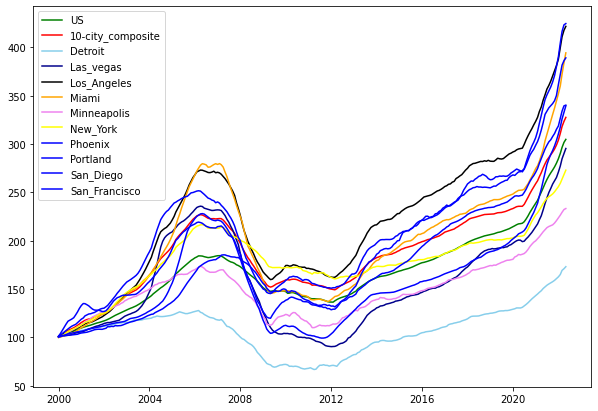

In [13]:

import plotly.express as px

plt.figure(figsize=(10,7))

plt.plot(df_new['DATE'], df_new['US'], color='g', label='US')
plt.plot(df_new['DATE'], df_new['10-City_Composite'], color='r', label='10-city_composite')
plt.plot(df_new['DATE'], df_new['Detroit'], color='skyblue', label='Detroit')
plt.plot(df_new['DATE'], df_new['Las_vegas'], color='darkblue', label='Las_vegas')
plt.plot(df_new['DATE'], df_new['Los_Angeles'], color='black', label='Los_Angeles')
plt.plot(df_new['DATE'], df_new['Miami'], color='orange', label='Miami')
plt.plot(df_new['DATE'], df_new['Minneapolis'], color='violet', label='Minneapolis')
plt.plot(df_new['DATE'], df_new['New_York'], color='yellow', label='New_York')
plt.plot(df_new['DATE'], df_new['Phoenix'], color='blue', label='Phoenix')
plt.plot(df_new['DATE'], df_new['Portland'], color='blue', label='Portland')
plt.plot(df_new['DATE'], df_new['San_Diego'], color='blue', label='San_Diego')
plt.plot(df_new['DATE'], df_new['San_Francisco'], color='blue', label='San_Francisco')



plt.legend()
plt.show()

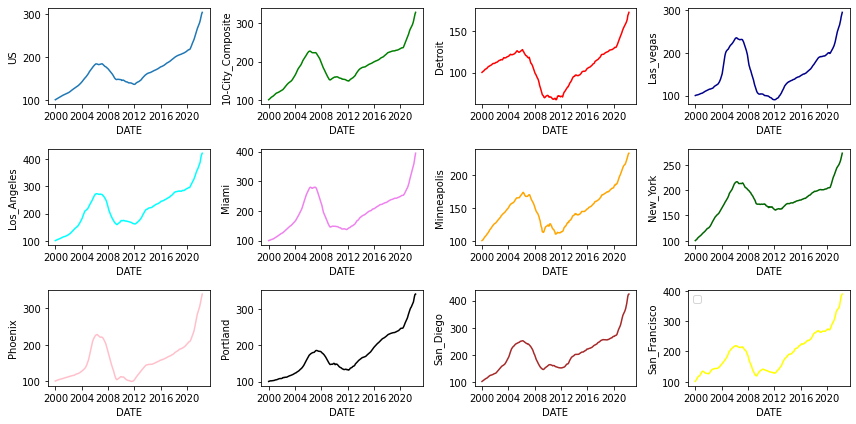

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(3,4,1)
sns.lineplot(data=df_new, x="DATE", y="US")
plt.subplot(3,4,2)
sns.lineplot(data=df_new, x="DATE", y="10-City_Composite",color='g')
plt.subplot(3,4,3)
sns.lineplot(data=df_new, x="DATE", y="Detroit",color='r')
plt.subplot(3,4,4)
sns.lineplot(data=df_new, x="DATE", y="Las_vegas",color='darkblue')
plt.subplot(3,4,5)
sns.lineplot(data=df_new, x="DATE", y="Los_Angeles",color='cyan')
plt.subplot(3,4,6)
sns.lineplot(data=df_new, x="DATE", y="Miami",color='violet')
plt.subplot(3,4,7)
sns.lineplot(data=df_new, x="DATE", y="Minneapolis",color='orange')
plt.subplot(3,4,8)
sns.lineplot(data=df_new, x="DATE", y="New_York",color='darkgreen')
plt.subplot(3,4,9)
sns.lineplot(data=df_new, x="DATE", y="Phoenix",color='pink')
plt.subplot(3,4,10)
sns.lineplot(data=df_new, x="DATE", y="Portland",color='black')
plt.subplot(3,4,11)
sns.lineplot(data=df_new, x="DATE", y="San_Diego",color='brown')
plt.subplot(3,4,12)
sns.lineplot(data=df_new, x="DATE", y="San_Francisco",color='yellow')

plt.legend()
plt.tight_layout()
plt.show()

View data of a benchmark of average single-family home prices in the U.S calculated monthly based on their changes in home prices.

CSUSHPISA - **S&P/Case-Shiller U.S. National Home Price Index**

In [21]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='US')
fig.show()

SPCS10RSA- **S&P/Case-Shiller 10-City Composite Home Price Index**

In [22]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='10-City_Composite')
fig.show()

DEXRSA - **S&P/Case-Shiller MI-Detroit Home Price Index**

In [23]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Detroit')
fig.show()

LVXRSA - **S&P/Case-Shiller NV-Las Vegas Home Price Index**

In [24]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Las_vegas')
fig.show()

LXXRSA - **S&P/Case-Shiller CA-Los Angeles Home Price Index**

In [25]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Los_Angeles')
fig.show()

MIXRSA - **S&P/Case-Shiller FL-Miami Home Price Index**

In [26]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Miami')
fig.show()

MNXRSA - **S&P/Case-Shiller MN-Minneapolis Home Price Index**

In [27]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Minneapolis')
fig.show()

NYXRSA - **S&P/Case-Shiller NY-New York Home Price Index**

In [30]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='New_York')
fig.show()

PHXRSA- **S&P/Case-Shiller AZ-Phoenix Home Price Index**

In [31]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Phoenix')
fig.show()

POXRSA - **S&P/Case-Shiller OR-Portland Home Price Index**

In [32]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='Portland')
fig.show()

SDXRSA - **S&P/Case-Shiller CA-San Diego Home Price Index**

In [33]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='San_Diego')
fig.show()

SFXRSA - **S&P/Case-Shiller CA-San Francisco Home Price Index**

In [34]:
import plotly.express as px
fig = px.bar(df_new, x='DATE', y='San_Francisco')
fig.show()

## *IMPORT DATASET 2*

Here, I took dataset2 for the model bulding purpose.

DATA: https://docs.google.com/spreadsheets/d/1IpUV8XtgWxES3JTrBz8O2j-3B58geFICQV6SgcF64JI/edit?usp=sharing

In [112]:
df2=pd.read_csv('/content/HOME_LLC - Sheet1.csv')

In [99]:
df2.head()

,DATE,STATES,SALES_PRICE
0,01/01/2000,US,100.552
1,02/01/2000,US,101.339
2,03/01/2000,US,102.127
3,04/01/2000,US,102.922
4,05/01/2000,US,103.677


In [113]:
df2.isnull().sum()

DATE           0
STATES         0
SALES_PRICE    0
dtype: int64

In [114]:
df2.columns

Index(['DATE', 'STATES', 'SALES_PRICE'], dtype='object')

## *DTYPE CORRECTION*

In [115]:
df2.dtypes

DATE            object
STATES          object
SALES_PRICE    float64
dtype: object

In [116]:
df2["DATE"] = df2["DATE"].astype('datetime64[ns]')
print(df2.dtypes)

DATE           datetime64[ns]
STATES                 object
SALES_PRICE           float64
dtype: object


In [117]:
df2['YEAR']=df2['DATE'].dt.year

In [118]:
df2.dtypes

DATE           datetime64[ns]
STATES                 object
SALES_PRICE           float64
YEAR                    int64
dtype: object

## *EDA FOR ENCODE*

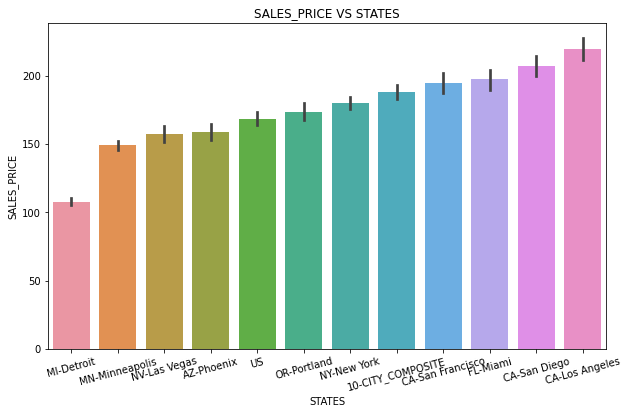

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x='STATES',y='SALES_PRICE',data=df2,order=df2.groupby('STATES')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STATES'])
plt.xticks(rotation=15)
plt.title('SALES_PRICE VS STATES')
plt.show()

In [121]:
df2['STATES']=df2['STATES'].map({'MI-Detroit':1,'MN-Minneapolis':2,'NV-Las Vegas':3,
                                 'AZ-Phoenix':4,'US':5,'OR-Portland':6,'NY-New York':7,
                                 '10-CITY_COMPOSITE':8,'CA-San Francisco':9,'FL-Miami':10,'CA-San Diego':11,
                                 'CA-Los Angeles':12})


In [120]:
df2['STATES'].unique()

array(['US', '10-CITY_COMPOSITE', 'MI-Detroit', 'NV-Las Vegas',
       'CA-Los Angeles', 'FL-Miami', 'MN-Minneapolis', 'NY-New York',
       'AZ-Phoenix', 'OR-Portland', 'CA-San Diego', 'CA-San Francisco'],
      dtype=object)

In [122]:
df2.isnull().sum()

DATE           0
STATES         0
SALES_PRICE    0
YEAR           0
dtype: int64

## **FEATURE SELECTION**

In [123]:
#FEATURES
X=df2[['YEAR','STATES']].values
#TARGET
Y=df2['SALES_PRICE'].values

## **SPLITING**

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## **XGBOOST**

In [130]:
x_train=X_train
y_train=Y_train
x_test=X_test
y_test=Y_test

In [131]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,2]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.671937053172037  Cross-Val score :  -0.6956788977287395
Learning rate :  0.02  Train score :  0.5454060297675539  Cross-Val score :  0.5347310682219566
Learning rate :  0.03  Train score :  0.7555317292749376  Cross-Val score :  0.7477537923768215
Learning rate :  0.04  Train score :  0.8098389266638693  Cross-Val score :  0.8025517517520651
Learning rate :  0.05  Train score :  0.8347595207370095  Cross-Val score :  0.8277202365210703
Learning rate :  0.06  Train score :  0.8486895455378709  Cross-Val score :  0.8406974264752275
Learning rate :  0.07  Train score :  0.857257424304421  Cross-Val score :  0.8519414596881238
Learning rate :  0.08  Train score :  0.8645769145101024  Cross-Val score :  0.8596806843904983
Learning rate :  0.09  Train score :  0.8729180210474539  Cross-Val score :  0.8653701842604219
Learning rate :  0.1  Train score :  0.8748989079599759  Cross-Val score :  0.8710785666469889
Learning rate :  0.11  Train score :  0.8

In [132]:
import xgboost as xgb
xgb = xgb.XGBRegressor(learning_rate = 1, n_estimators=100)
xgb.fit(x_train,y_train)

[14:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=1)

In [133]:
y_test=Y_test
y_pred = xgb.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,160.418955,157.803253
1,155.892916,162.212921
2,241.298470,240.757736
3,133.561302,137.960312
4,206.148795,200.378296
...,...,...
641,191.069970,196.551437
642,124.827264,166.632553
643,155.092436,151.215866
644,122.385140,110.697235


## *EVALUATION METRIC*

In [134]:
print(metrics.r2_score(xgb.predict(X_test),y_test))

0.8717921499855473


Using the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

BY OBSERVING FEW LINKS:

https://realestatedecoded.com/case-shiller/

          I got that the SALES PRICE OF HOME is depends upon the DEMAND AND THE SUPPLY of the home.
          One of major factor is manufacturing materials cost and it's demand and supply.
          And another one of the factor is mortgage payment.